In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

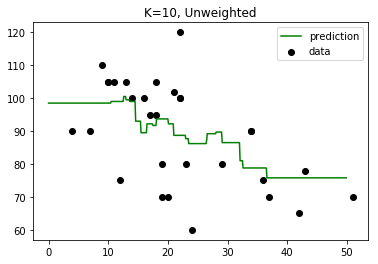

In [4]:
from sklearn import neighbors

# build our model
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for predictions
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

# Same Model but with Weights

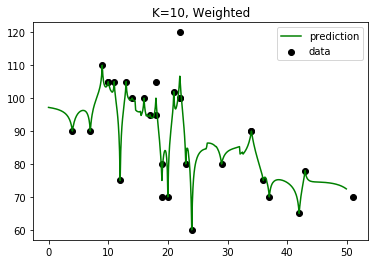

In [8]:
# Run the same model, this time with weights
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# set up our prediction line
T_w = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_w = knn_w.predict(T_w)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T_w, Y_w, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

# Evaluating our KNN Models with k-fold Cross Validation

In [6]:
# The test statistic given by this model is R^2, which measures the same as in linear regression

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f, (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f, (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18, (+/- 0.66)
Weighted Accuracy: 0.11, (+/- 0.94)


# Drill: Add the Other Feature and Mess Around with k and Weighting

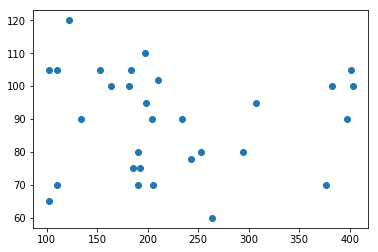

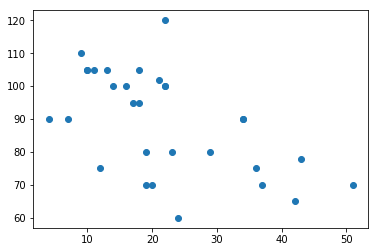

In [12]:
invar = [music['duration'], music['loudness']]

for item in invar:
    plt.scatter(x=item, y=music['bpm'])
    plt.show()

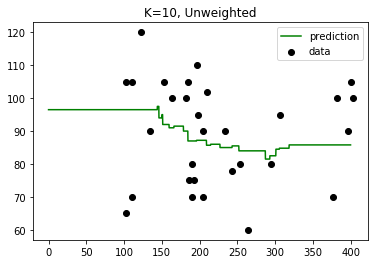

In [14]:
# Lets try the model with duration as the input variable

# build our model
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.duration)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line
T = np.arange(0, 400, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for predictions
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

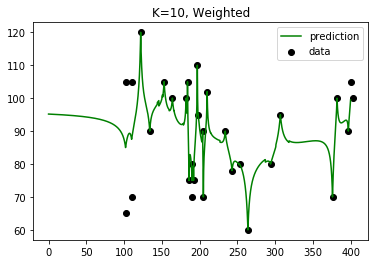

In [15]:
# Run the same model, this time with weights
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.duration)
Y = music.bpm
knn_w.fit(X, Y)

# set up our prediction line
T_w = np.arange(0, 400, 0.1)[:, np.newaxis]

Y_w = knn_w.predict(T_w)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T_w, Y_w, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [16]:
# The test statistic given by this model is R^2, which measures the same as in linear regression

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f, (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f, (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.44, (+/- 0.81)
Weighted Accuracy: -0.78, (+/- 0.77)


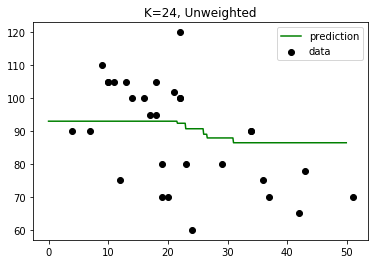

In [26]:
# It appears that the variable duration is an even worse predictor than loudness
# Lets try switching back to loudness and increasing k

# build our model
knn = neighbors.KNeighborsRegressor(n_neighbors=24)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for predictions
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=24, Unweighted')
plt.show()

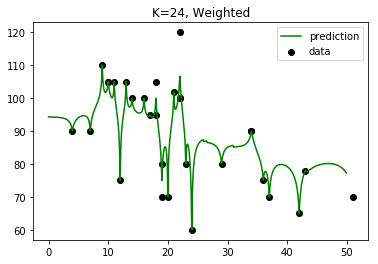

In [27]:
# Run the same model, this time with weights
knn_w = neighbors.KNeighborsRegressor(n_neighbors=24, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# set up our prediction line
T_w = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_w = knn_w.predict(T_w)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T_w, Y_w, c='g', label='prediction')
plt.legend()
plt.title('K=24, Weighted')
plt.show()

In [28]:
# The test statistic given by this model is R^2, which measures the same as in linear regression

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f, (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f, (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.28, (+/- 0.47)
Weighted Accuracy: 0.12, (+/- 0.71)


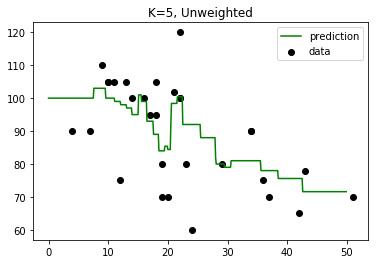

In [29]:
# What happens when we use fewer neighbors?

# build our model
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for predictions
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=5, Unweighted')
plt.show()

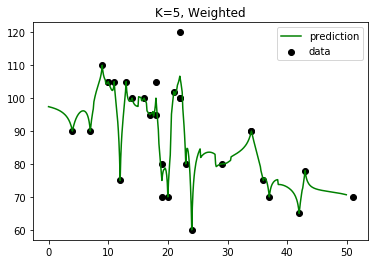

In [30]:
# Run the same model, this time with weights
knn_w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# set up our prediction line
T_w = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_w = knn_w.predict(T_w)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T_w, Y_w, c='g', label='prediction')
plt.legend()
plt.title('K=5, Weighted')
plt.show()

In [31]:
# The test statistic given by this model is R^2, which measures the same as in linear regression

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f, (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f, (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.28, (+/- 1.20)
Weighted Accuracy: 0.12, (+/- 0.93)


In [32]:
# The accuracy appears to be the same as when k is 24, but the confidence interval is much more broad.
# Lets add both features together as inputs and see how that affects the model.



In [43]:
# build our model
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = music.drop(['bpm'], 1)
Y = music.bpm
knn.fit(X, Y)

# Run the same model, this time with weights
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = music.drop(['bpm'], 1)
Y = music.bpm
knn_w.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')

In [44]:
# The test statistic given by this model is R^2, which measures the same as in linear regression

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f, (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f, (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.42, (+/- 0.78)
Weighted Accuracy: -0.26, (+/- 0.74)
